<a href="https://colab.research.google.com/github/LoPA607/AIDS_248/blob/main/23b0049_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Bayes!

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Recall some theory

- Let $H$ be the hypothesis, let $E$ be the evidence or data, then recall that:

$$
f(H|E) = \frac{f(E|H) f(H)}{f(E)}   
$$

- Specifically for an unknown parameter $\theta$ and
- A sample with data $x_1,\ldots,x_n$,
- We have

$$\begin{aligned}
f(\theta|x_1,\ldots,x_n) &=
\frac{f(\theta, x_1, \ldots, x_n)}{f(x_1, \ldots, x_n)} \\
&= \frac{p(\theta)f(x_1, \ldots, x_n|\theta)}{\int f(x_1, \ldots,
x_n|\theta) p(\theta) d\theta}
\end{aligned}$$

## Problem

* Consider a coin which may be biased or not.
* We want to assess the parameter, $p$ but using a Bayesian approach.
* $p$ is our unknown $\theta$
* Want to estimate the distribution of $p$ from an initial guess/belief and data

## Generating the data

In [2]:
N = 50
data = np.random.choice([0, 1], size=N)

## Setting up the problem

* Assume a prior, we start with a uniform distribution
* We need the likelihood function: $f(x| \theta) = \theta^x (1-\theta)^{1-x}$
* Samples are independent so we can easily construct the joint likelihood.
* We solve the problem by numerical integration
* Recall that we are looking to find $\theta$
    * Fix the domain to 100 points between 0 and 1.

## Back to the problem at hand

In [3]:
nt = 100
d_theta = 1.0/nt
domain = np.arange(d_theta/2, 1, d_theta)

In [4]:
def likelihood(theta, data):
    """Assumes that theta is a scalar"""
    return np.prod(np.pow(theta, data)*np.pow(1-theta, 1-data))

@np.vectorize
def prior_func(theta):
    if (theta < 0.0) or (theta > 1.0):
        return 0.0
    else:
        return 1.0

In [5]:
def integral_dnr(l, prior, dtheta):
    """Assumes that l and prior are uniformly discretized"""
    return np.sum(l*prior)*dtheta


In [6]:
lh = []
for t in domain:
    lh.append(likelihood(t, data))
lh = np.array(lh)

In [7]:
lh = np.array([likelihood(t, data) for t in domain])

In [8]:
prior = prior_func(domain)

In [9]:
dnr = integral_dnr(lh, prior, d_theta)

In [10]:
posterior = prior*lh/dnr

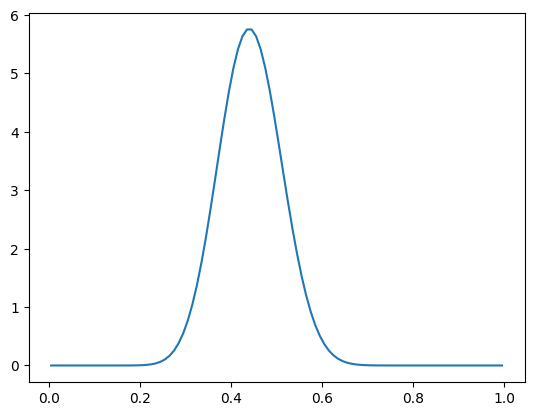

In [11]:
plt.plot(domain, posterior)

## Textbook answer

- $x=\sum_i x_i$

$$f(\theta|x_1,\ldots,x_n) = \frac{(n+1)! \theta^x (1-\theta)^{n-x}}{x! (n-x)!}$$


In [12]:
from scipy.special import factorial

def f_exact(theta, x, n):
    return factorial(n+1)*theta**x*(1-theta)**(n-x)/(factorial(x)*factorial(n-x))

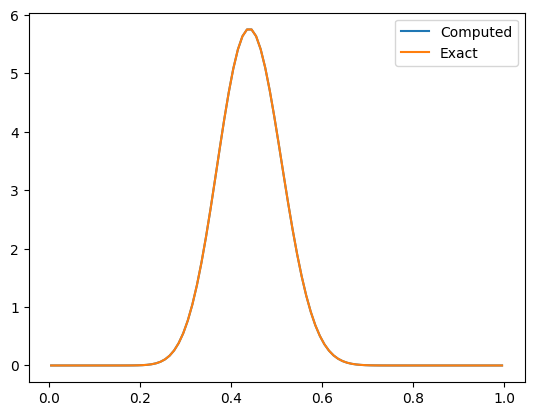

In [13]:
plt.plot(domain, posterior, label='Computed')
x = np.sum(data)
plt.plot(domain, f_exact(domain, x, N), label='Exact')
plt.legend();

## Bayes estimator

- Best estimate of $\theta$ is the mean of the posterior:

$$E[\theta|X_1=x_1, \ldots, X_n=x_n] = \int \theta f(\theta|x_1,\ldots,x_n)
d\theta$$

Ques 1)<br>

Complete the homework problem given in the notebook and find E[θ|X1=x1,…,Xn=xn], compare your answer with the textbook one. Do this for different values of N. (1/2 mark)

In [14]:
# Homework
def estimator(domain,posterior):
  return np.sum(domain*posterior)

estimate=estimator(domain,posterior)
estimate=estimate/nt #since it calculates weighted average
print(estimate)

0.4423076923076923


In [15]:
#compre with textbook answer
num=(np.sum(data))+1
n=len(data)
denom=n+2
print(num/denom)

0.4423076923076923


## Textbook answer

$$E[\theta|X_1=x_1, \ldots, X_n=x_n] = \frac{x+1}{n+2}$$

In [16]:
def likelihood(theta, data):
    """Assumes that theta is a scalar"""
    return np.prod(np.pow(theta, data)*np.pow(1-theta, 1-data))

@np.vectorize
def prior_func(theta):
    if (theta < 0.0) or (theta > 1.0):
        return 0.0
    else:
        return 1.0

def integral_dnr(l, prior, dtheta):
    """Assumes that l and prior are uniformly discretized"""
    return np.sum(l*prior)*dtheta

def f_exact(theta, x, n):
    return factorial(n+1)*theta**x*(1-theta)**(n-x)/(factorial(x)*factorial(n-x))





<ipython-input-16-df6dbf71613c>:17: RuntimeWarning: overflow encountered in scalar multiply
  return factorial(n+1)*theta**x*(1-theta)**(n-x)/(factorial(x)*factorial(n-x))
<ipython-input-16-df6dbf71613c>:17: RuntimeWarning: invalid value encountered in divide
  return factorial(n+1)*theta**x*(1-theta)**(n-x)/(factorial(x)*factorial(n-x))
<ipython-input-16-df6dbf71613c>:17: RuntimeWarning: invalid value encountered in multiply
  return factorial(n+1)*theta**x*(1-theta)**(n-x)/(factorial(x)*factorial(n-x))


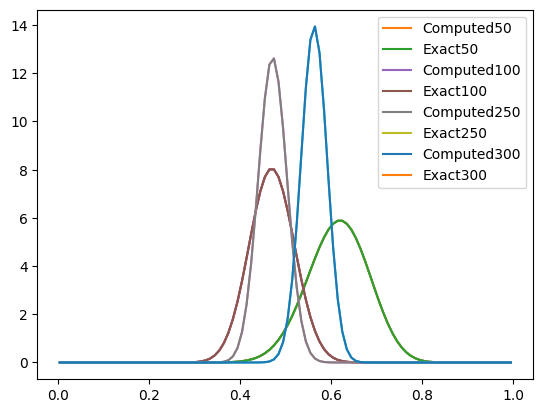

In [18]:

N = [50,100,250,300]

for i in range(len(N)):
  data = np.random.choice([0, 1], size=N[i])
  nt = 100
  d_theta = 1.0/nt
  domain = np.arange(d_theta/2, 1, d_theta)
  lh = []
  for t in domain:
      lh.append(likelihood(t, data))
  lh = np.array(lh)


  lh = np.array([likelihood(t, data) for t in domain])

  prior = prior_func(domain)

  dnr = integral_dnr(lh, prior, d_theta)

  posterior = prior*lh/dnr

  plt.plot(domain, posterior)
  plt.plot(domain, posterior, label='Computed'+str(N[i]))
  x = np.sum(data)
  plt.plot(domain, f_exact(domain, x, N[i]), label='Exact'+str(N[i]))
  plt.legend();

Ques2)<br>

 Change the initial prior to a uniform distribution between 0.4 and 0.6 and then evaluate the posterior using this but with 5, 10, and 20 samples. What is the problem with this prior? How would you rectify it?  How much difference does the choice of a reasonable prior make, for example what if you had a triangle shaped one?  Compare the uniform with this choice after say 20 samples

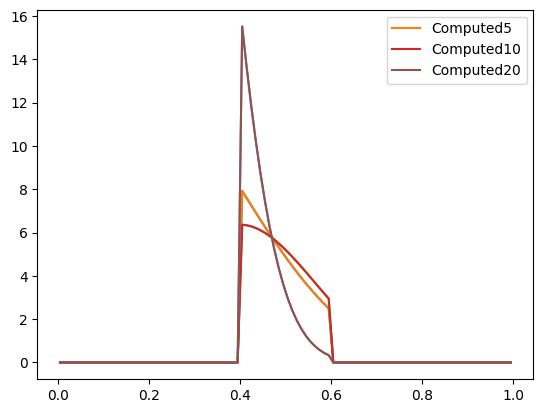

In [17]:
@np.vectorize
def new_prior(theta):
    if (theta < 0.4) or (theta > 0.6):
        return 0.0
    else:
        return 1.0

New_samples = [5,10,20]
for i in range(len(New_samples)):
  data = np.random.choice([0, 1], size=New_samples[i])
  domain= np.arange(d_theta/2, 1, d_theta)
  nt = 100
  d_theta = 1.0/nt
  lh = []
  for t in domain:
      lh.append(likelihood(t, data))
  lh = np.array(lh)
  lh = np.array([likelihood(t, data) for t in domain])
  prior = new_prior(domain)
  dnr = integral_dnr(lh, prior, d_theta)
  posterior = prior*lh/dnr
  plt.plot(domain, posterior)
  plt.plot(domain, posterior, label='Computed'+str(New_samples[i]))
  plt.legend();


problem with prior: the prior is not normalized, it is not a probability distribution<br>
rectify: normalize the prior<br>
difference: the choice of a reasonable prior can make a huge difference in the posterior<br>
uniform prior: the posterior is not very accurate<br>
triangle prior: the posterior is more accurate

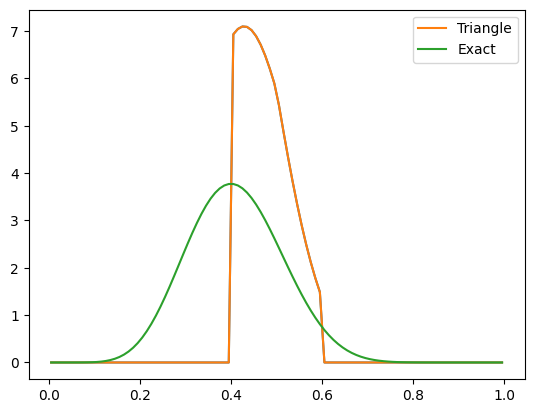

In [19]:
@np.vectorize
def triangle_prior(theta):
    if (theta < 0.4) or (theta > 0.6):
        return 0.0
    elif theta <= 0.5:
        return 2*theta
    else:
        return 2*(1-theta)

#uniform vs triangle choice

#triangle
data_size_20= np.random.choice([0, 1], size=20)
lh = []
for t in domain:
    lh.append(likelihood(t, data_size_20))
lh = np.array(lh)
prior = triangle_prior(domain)
dnr = integral_dnr(lh, prior, d_theta)
posterior = prior*lh/dnr
plt.plot(domain, posterior)
plt.plot(domain, posterior, label='Triangle')
x = np.sum(data_size_20)
plt.plot(domain, f_exact(domain, x, 20), label='Exact')
plt.legend()
plt.show()


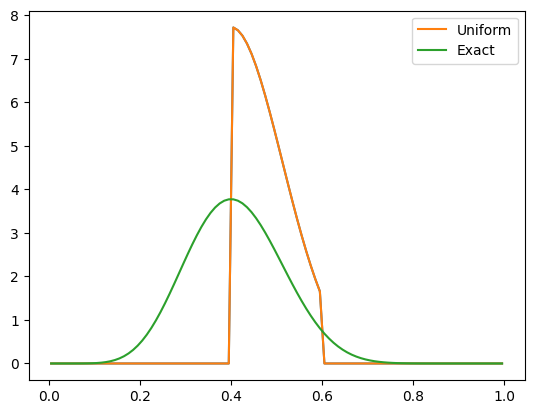

In [20]:
#uniform

prior = new_prior(domain)
dnr = integral_dnr(lh, prior, d_theta)
posterior = prior*lh/dnr
plt.plot(domain, posterior)
plt.plot(domain, posterior, label='Uniform')
x = np.sum(data_size_20)
plt.plot(domain, f_exact(domain, x, 20), label='Exact')
plt.legend();
plt.show()


#triangle is more accurate than uniform

3)
Setup a suitable random variable for a suitably biased coin and see if you are able to detect this using the Bayesian approach with a reasonable initial prior (uniform is OK). You can compute the posterior and the Bayes estimator of p of the coin.

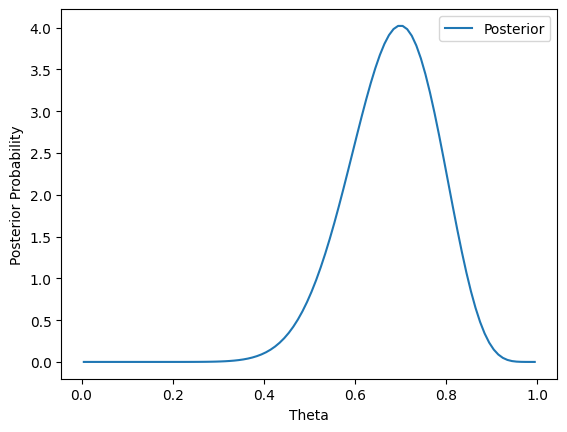

Bayes estimator of p: 0.6818181818200046


In [25]:
r = 0.7
data = np.random.choice([0, 1], size=20, p=[1-r, r])
nt = 100
d_theta = 1.0 / nt
domain = np.arange(d_theta / 2, 1, d_theta)
lh = []
for t in domain:
    lh.append(likelihood(t, data))
lh = np.array(lh)
prior = prior_func(domain)
dnr = integral_dnr(lh, prior, d_theta)
posterior = prior * lh / dnr
plt.plot(domain, posterior, label='Posterior')
plt.xlabel('Theta')
plt.ylabel('Posterior Probability')
plt.legend()
plt.show()
bayes_estimator = np.sum(domain * posterior * d_theta)
print(f"Bayes estimator of p: {bayes_estimator}")